<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Characterization models</b></h2></center>

# Libraries importing and configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from darknet.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
random_state = 42
dataset_folder = "dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [3]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
samples = samples[samples['Label'] == 'Darknet']
del samples['Label']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
117170,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117171,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117172,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117173,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Audio-Streaming
117174,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Audio-Streaming


# Darknet characterization

In [4]:
X, y, labels = split_train_target(samples, "Label.1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
columns = samples.columns.tolist()

metrics = ["Precision", "Recall", "F1-score"]
display = ["Precisão", "Recall", "F-Score"]
models = ["Decision tree", "Random forest"]

## Decision tree

100%|██████████| 10/10 [00:05<00:00,  1.68it/s, Test acc. #9=0.99]


               precision       recall       f1-score       support       
Audio-Streaming:  99.63		99.71		99.67		88830.00		
Browsing:         93.73		84.41		88.53		1750.00		
Chat:             99.09		99.31		99.20		30520.00		
Email:            96.07		96.20		96.08		3930.00		
File-Transfer:    98.27		98.32		98.29		17300.00		
P2P:              97.24		97.50		97.18		1570.00		
VOIP:             97.60		97.77		97.67		9860.00		
Video-Streaming:  96.39		96.16		96.26		9120.00		


 10-fold Accuracy: 98.90%
Test accuracy: 99.09%


Confusion matrix:
[[4388    4    9    0    0    0    0    0]
 [   5   80    0    0    1    1    1    0]
 [   4    3 1480    0    1    0    1    0]
 [   0    0    0  183    6    0    0    0]
 [   0    0    0   11  866    0    0    3]
 [   0    0    0    0    0   63    0    0]
 [   0    0    1    0    0    0  473    5]
 [   0    0    2    0    4    2    9  417]]

Audio-Streaming :   99.80%
Browsing :          91.95%
Chat :              99.20%
Email :             94.33%
File-Tr

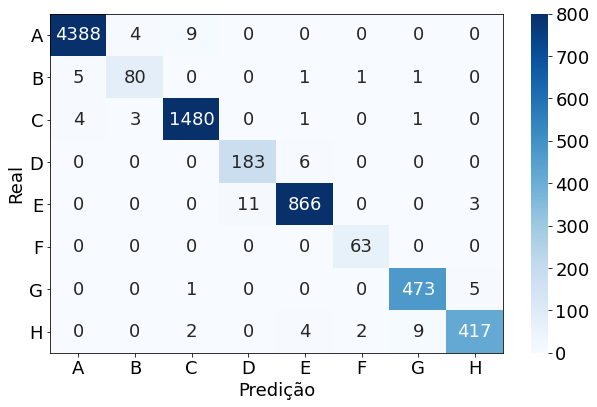

In [5]:
dt = DecisionTreeClassifier()
report_dt, accs_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="imgs/dt_conf_app", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

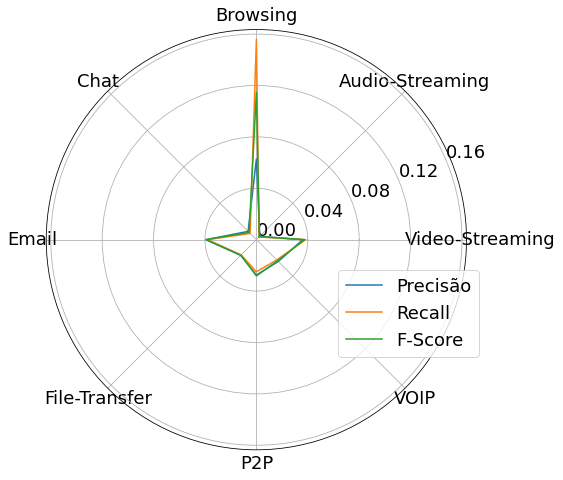

In [6]:
metrics_polar_plot(report_dt, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_dt", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Random forest

100%|██████████| 10/10 [00:27<00:00,  2.75s/it, Test acc. #9=0.982]


               precision       recall       f1-score       support       
Audio-Streaming:  99.51		99.03		99.27		88830.00		
Browsing:         88.55		83.37		85.44		1750.00		
Chat:             98.44		99.05		98.74		30520.00		
Email:            97.20		95.93		96.54		3930.00		
File-Transfer:    98.26		97.17		97.70		17300.00		
P2P:              95.55		97.50		96.29		1570.00		
VOIP:             96.99		97.26		97.11		9860.00		
Video-Streaming:  91.11		96.05		93.50		9120.00		


 10-fold Accuracy: 98.31%
Test accuracy: 98.23%


Confusion matrix:
[[4360    2   16    0    6    0    0   17]
 [   7   74    3    0    0    0    1    3]
 [   9    4 1461    1   13    0    0    1]
 [   0    0    1  184    4    0    0    0]
 [   9    0    5    4  855    0    3    4]
 [   2    0    0    0    0   61    0    0]
 [   1    1    1    0    2    0  468    6]
 [   1    2    0    0    3    0   10  418]]

Audio-Streaming :   99.34%
Browsing :          89.16%
Chat :              98.25%
Email :             97.35%
File-Tr

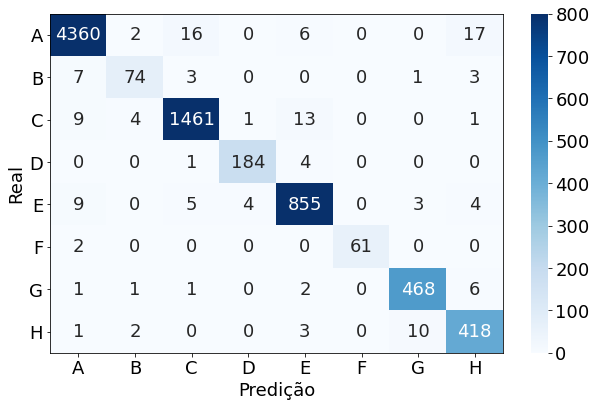

In [7]:
rf = RandomForestClassifier()
report_rf, accs_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                         figsize=(9,6), rotation=(0,0), fname="imgs/rf_conf_app",
                        display_labels=["A", "B", "C", "D", "E","F","G","H"], vmax=800)

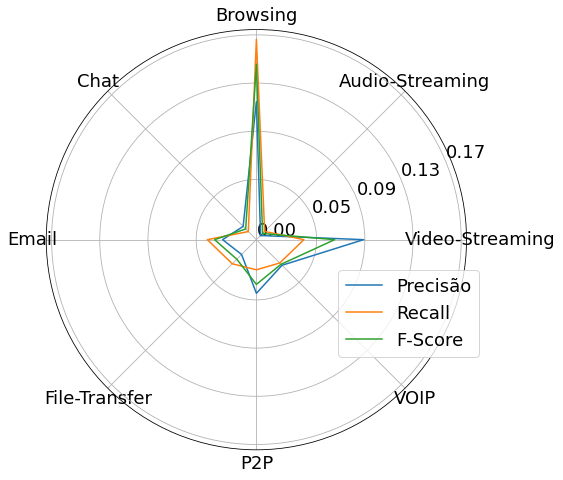

In [8]:
metrics_polar_plot(report_rf, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_rf", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Models accuracy comparison

In [10]:

accs = {models[0]: accs_dt, models[1]: accs_rf}
accs

{'Decision tree': {'Audio-Streaming': 99.79531498749147,
  'Browsing': 91.95402298850574,
  'Chat': 99.19571045576407,
  'Email': 94.3298969072165,
  'File-Transfer': 98.63325740318906,
  'P2P': 95.45454545454545,
  'VOIP': 97.72727272727273,
  'Video-Streaming': 98.11764705882354},
 'Random forest': {'Audio-Streaming': 99.33925723399408,
  'Browsing': 89.1566265060241,
  'Chat': 98.25151311365164,
  'Email': 97.35449735449735,
  'File-Transfer': 96.82899207248018,
  'P2P': 100.0,
  'VOIP': 97.0954356846473,
  'Video-Streaming': 93.0957683741648}}

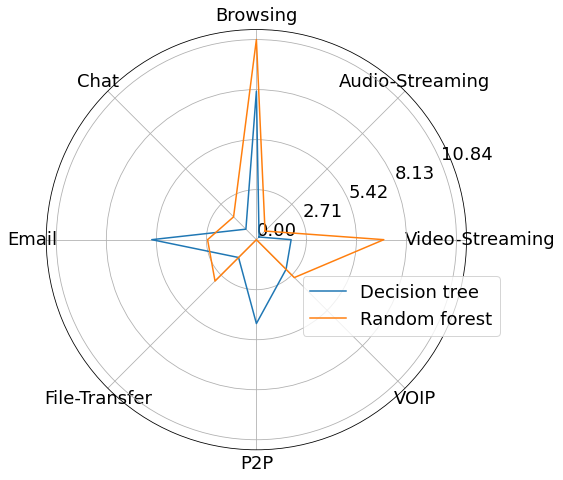

In [11]:
accuracy_polar_plot(accs, labels, models, figsize=(8,8), 
                    bbox_to_anchor=(1, 0.25, 0.1,4), fname='imgs/comparativo_acc')

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import *

In [13]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Decision tree mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_dt)*100, np.std(scores_dt)*100))

Decision tree mean accuracy: 99.153% (0.185)


In [14]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Random forest mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_rf)*100, np.std(scores_rf)*100))

Random forest mean accuracy: 98.745% (0.236)


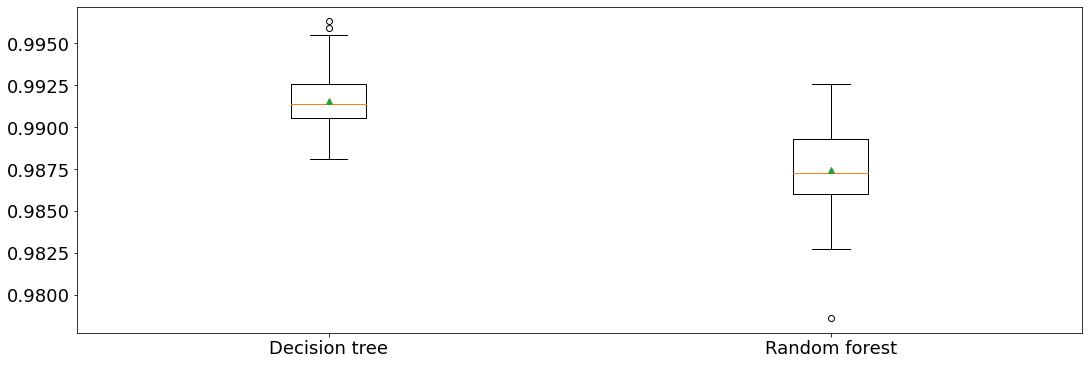

In [15]:
plt.boxplot([scores_dt, scores_rf], labels=['Decision tree', 'Random forest'], showmeans=True)
plt.show()

In [16]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=rf, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 5.360
p value: 0.003


In [17]:
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

Difference between mean performance is probably real
